In [1]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

jax.config.update('jax_platform_name', 'cpu')

import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import pymudokon as pm

(<Figure size 640x480 with 9 Axes>,
 array([[<Axes: ylabel='Strain_11'>, <Axes: >, <Axes: >],
        [<Axes: ylabel='Strain_21'>, <Axes: >, <Axes: >],
        [<Axes: ylabel='Strain_31'>, <Axes: >, <Axes: >]], dtype=object))

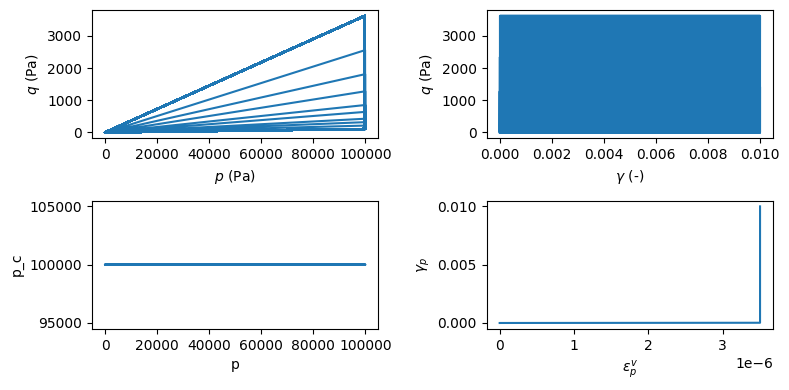

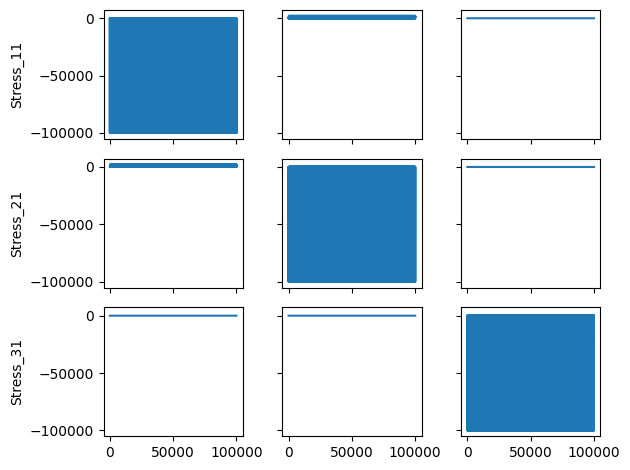

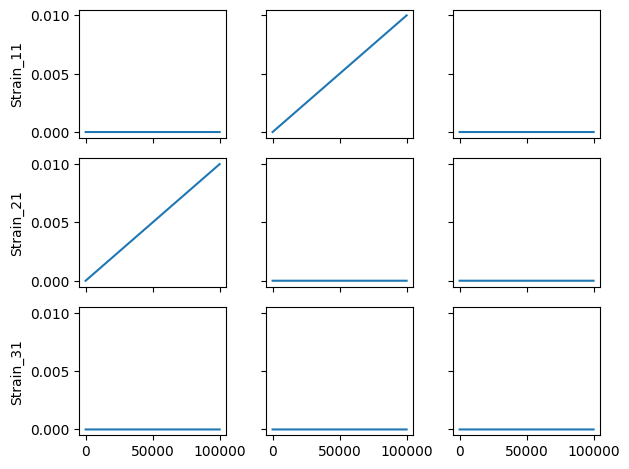

In [2]:
dt = 1e-5

carry, accumulate = pm.simple_shear_wrapper(
    pm.ModifiedCamClay,
    [
        0.8e9, # E
        0.3, # nu
        0.9, # M
        1, # R
        0.062, # lam
        0.0022, # kap
        1, #VS
    ],
    target=0.01,
    # target = 1e-4,
    dt=dt,
    total_time=1,
    # total_time=dt*10,
    volume_fraction=0.7,
    stress_ref= -1e5* jnp.eye(3).reshape(3, 3),
    keys=("stress", "strain_rate","volume_fraction","p_c0", "eps_e"),
    store_every = 1
)

stress_stack, strain_rate_stack,  volume_fraction_stack, p_c_stack, eps_e_stack = accumulate

strain_stack = strain_rate_stack.cumsum(axis=0) *dt

eps_e_stack = eps_e_stack.reshape(-1,3,3)


# print(strain_stack)
fig,ax = plt.subplots(2,2,figsize=(8,4))

pm.plot_q_p(
    stress_stack,
    normalize_stress = 1,
    fig_ax = (fig,ax[0,0]),
)

pm.plot_q_gamma(
    stress_stack,
    strain_stack,
    normalize_stress = 1,
    fig_ax = (fig,ax[0,1]),

)

pressures_stack = pm.get_pressure_stack(stress_stack)

ax[1,0].plot(pressures_stack, p_c_stack)
ax[1,0].set_xlabel("p")
ax[1,0].set_ylabel("p_c")


eps_p_stack = pm.get_plastic_strain_stack(
    strain_stack,
    eps_e_stack
)

eps_p_v_stack = pm.get_volumetric_strain_stack(eps_p_stack)

gamma_p_stack = pm.get_scalar_shear_strain_stack(eps_p_stack)

ax[1,1].plot(eps_p_v_stack, gamma_p_stack)
ax[1,1].set_ylabel("$\\gamma_p$")
ax[1,1].set_xlabel("$\\varepsilon_p^v$")


plt.tight_layout()

pm.plot_tensor(
    stress_stack,
    ylabel="Stress",
)
pm.plot_tensor(
    strain_stack,
    ylabel="Strain",
)


(<Figure size 640x480 with 9 Axes>,
 array([[<Axes: ylabel='Strain_11'>, <Axes: >, <Axes: >],
        [<Axes: ylabel='Strain_21'>, <Axes: >, <Axes: >],
        [<Axes: ylabel='Strain_31'>, <Axes: >, <Axes: >]], dtype=object))

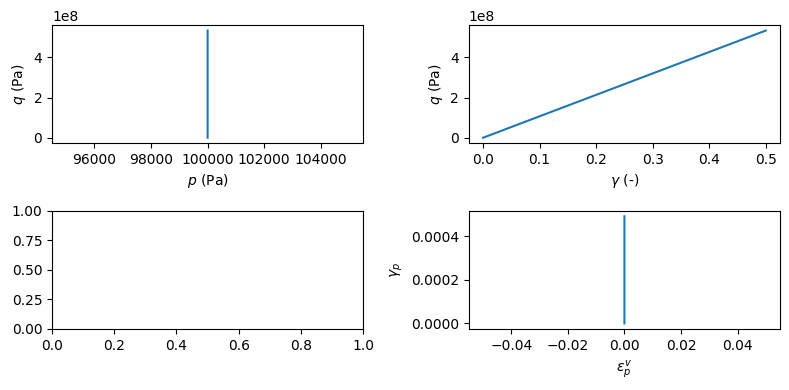

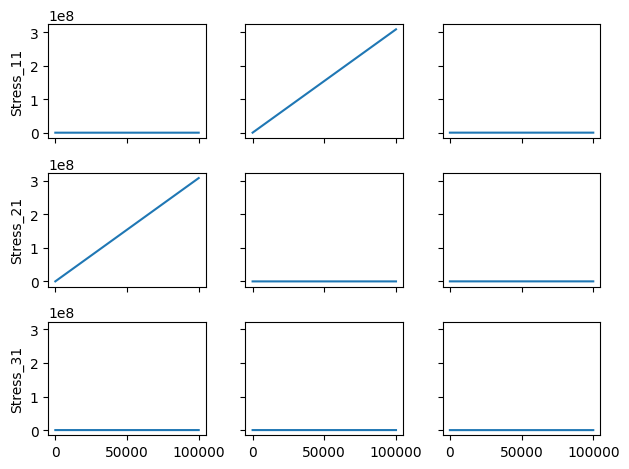

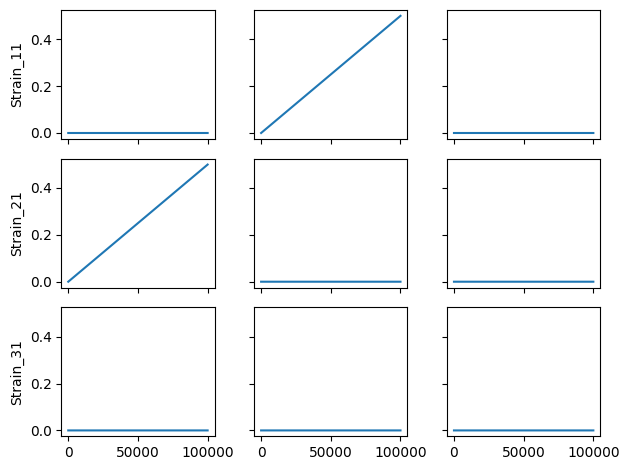

In [12]:
dt = 1e-5

carry, accumulate = pm.simple_shear_wrapper(
    pm.DruckerPrager,
    # [
    #     0.8e9, # E
    #     0.3, # nu
    #     0.9, # M
    #     1, # R
    #     0.062, # lam
    #     0.0022, # kap
    #     1, #VS
    # ],
    [
        0.8e9, 
        0.3,
        np.arcsin(0.5)/jnp.sqrt(3),
        np.arcsin(0.5)/jnp.sqrt(3),
        0,
        0.0, 
        3],
    target=0.5,
    # target = 1e-4,
    dt=dt,
    total_time=1,
    # total_time=dt*10,
    volume_fraction=0.7,
    stress_ref= -1e5* jnp.eye(3).reshape(3, 3),
    keys=("stress", "strain_rate","volume_fraction", "eps_e"),
    store_every = 1
)

stress_stack, strain_rate_stack,  volume_fraction_stack, eps_e_stack = accumulate

strain_stack = strain_rate_stack.cumsum(axis=0) *dt

eps_e_stack = eps_e_stack.reshape(-1,3,3)


# print(strain_stack)
fig,ax = plt.subplots(2,2,figsize=(8,4))

pm.plot_q_p(
    stress_stack,
    normalize_stress = 1,
    fig_ax = (fig,ax[0,0]),
)

pm.plot_q_gamma(
    stress_stack,
    strain_stack,
    normalize_stress = 1,
    fig_ax = (fig,ax[0,1]),

)

pressures_stack = pm.get_pressure_stack(stress_stack)

# ax[1,0].plot(pressures_stack, p_c_stack)
# ax[1,0].set_xlabel("p")
# ax[1,0].set_ylabel("p_c")


eps_p_stack = pm.get_plastic_strain_stack(
    strain_stack,
    eps_e_stack
)

eps_p_v_stack = pm.get_volumetric_strain_stack(eps_p_stack)

gamma_p_stack = pm.get_scalar_shear_strain_stack(eps_p_stack)

ax[1,1].plot(eps_p_v_stack, gamma_p_stack)
ax[1,1].set_ylabel("$\\gamma_p$")
ax[1,1].set_xlabel("$\\varepsilon_p^v$")


plt.tight_layout()

pm.plot_tensor(
    stress_stack,
    ylabel="Stress",
)
pm.plot_tensor(
    strain_stack,
    ylabel="Strain",
)


In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# # pm.materials.vp_mcc_mu_i_classic.plot_yield_surface(
# #     ax = ax,
# #     p_range =(0,1000,10),
# #     q_range = (0,1000,10),
# #     M = 0.5,
# #     p_c = 1000
# # )

In [ ]:
# dt = 1e-3

# total_time = 25 

# num_steps = int(total_time/dt)

# target = 0.1

# deps_dt = (target / num_steps) / dt

# stress_ref = jnp.eye(3)*-1000

# p_ref = pm.get_pressure(stress_ref)

# s_ref = pm.get_dev_stress(stress_ref)

# kap = 0.005
# E= 5e5 # E
# nu= 0.2 # nu
# G = E / (2.0 * (1.0 + nu))
# lam = 0.1
# M = 0.5
# pc0= 1000

# strain_rate = jnp.zeros((3,3)).at[0,1].set(deps_dt).at[1,0].set(deps_dt)

# deps =  strain_rate*dt

# eps_e_v = pm.get_volumetric_strain(deps)

# eps_e_d = pm.get_dev_strain(deps, eps_e_v)

# # s_tr = pm.materials.vp_mcc_mu_i_classic.get_dev_stress_elastic(
# #     eps_e_d, s_ref,G
# # )

# # p_tr = pm.materials.vp_mcc_mu_i_classic.get_non_linear_pressure(
# #     eps_e_v = eps_e_v,
# #     kap = kap,
# #     p_ref = p_ref
# # )

# # q_tr = pm.get_q_vm(s_tr)
# # # q_tr = 500

# # is_ep = pm.materials.vp_mcc_mu_i_classic.yield_function(
# #     q = q_tr,
# #     p = p_tr,
# #     M = M,
# #     p_c =pc0
# # )

# # value, aux = pm.materials.vp_mcc_mu_i_classic.return_mapping(
# #     p_tr = p_tr,
# #     q_tr=q_tr,
# #     s_tr = s_tr,
# #     eps_e_v_tr = eps_e_v,
# #     p_ref = p_ref,
# #     pc0=pc0,
# #     eps_p_v_prev = 0.,
# #     kap = kap,
# #     lam = lam,
# #     M = M,
# #     G = G
# # )

# # pmulti, eps_p_v = value


# # p_next = pm.materials.vp_mcc_mu_i_classic.get_non_linear_pressure(
# #     eps_e_v = eps_e_v - eps_p_v,
# #     kap = kap,
# #     p_ref = p_ref
# # )
# # p_next


In [ ]:
# mcc = pm.Vp_MuI_classic.create(
#      *[
#         1.2, # M
#         1.0, # R
#         5e8, # E
#         0.2, # nu
#         0.1, # lam
#         0.01 # kap
#     ],
#      stress_ref=jnp.eye(3).reshape(-1,3,3)*-1000,
# )
# mat, stress= mcc.update_stress_benchmark(
#     stress_prev = stress_ref.reshape(-1,3,3),
#     strain_rate = strain_rate.reshape(-1,3,3),
#     dt = dt,
#     volume_fraction = jnp.array(0.7)
# )
# stress

In [ ]:
# Model = pm.Vp_MuI_classic
# params =  [
#         1.2,
#         # 0.12, # mu_s
#         0.55, # mu_d
#         0.2, # I0
#         0.634, # phi_c
#         3.28, # I_phi
#         1.0, # rho_p
#         1.0, # d
#         1.0, # R
#         5e5, # E
#         0.2, # nu
#         0.1, # lam
#         0.01 # kap
#     ]

# Return mapping on p-axis

In [ ]:
stress_stack

In [ ]:
pm.materials.vp_mcc_mu_i_classic.return_mapping(
    p_tr,q_tr,s_tr,
)

In [ ]:
pm.materials.vp_mcc_mu_i_classic.return_mapping(
    p_tr = p_tr,
    q_tr = 0.0,
    deps_e_v_tr = deps,
    p_prev = 1000,
    p_c_prev = p_c0,
    kap = kap,
    lam = lam,
    M = M,
    G = G
)


# return mapping at critical state

In [ ]:
# pdt = 1e-3

total_time = 25 

num_steps = int(total_time/dt)

target = 0.1

deps_dt = (target / num_steps) / dt
deps = deps_dt*dt
kap = 0.005
lam = 0.1
M = 0.5
p_c0 = 1000
G = 10000
p_tr = pm.materials.vp_mcc_mu_i_classic.get_p(
    deps_e_v = deps,
    kap = kap,
    p_prev = p_c0/2
)

pm.materials.vp_mcc_mu_i_classic.yield_function(
    q = 250,
    p = p_tr,
    M= M,
    p_c = p_c0
)

In [ ]:
p_tr

In [ ]:
pm.materials.vp_mcc_mu_i_classic.return_mapping(
    p_tr = p_tr,
    q_tr = 250,
    deps_e_v_tr = deps,
    p_prev = p_c0/2,
    p_c_prev = p_c0,
    kap = kap,
    lam = lam,
    M = M,
    G = G,
    pst =500
)

In [ ]:
deps-8.4332474e-05

In [ ]:
p_tr = pm.materials.vp_mcc_mu_i_classic.get_p(
    deps_e_v = deps,
    kap = kap,
    p_prev = p_c0/2
)

In [ ]:


fig, ax = plt.subplots()

p_stack = []
# phi_stack = df_k3["nu"].values
phi_stack = jnp.arange(0.3,0.7,0.01)
for phi in phi_stack:
    val = pm.materials.vp_mcc_mu_i_classic.solve_pst(
    phi = phi,
    dgamma_dt = 1,
    d = 1,
    rho_p = 1,
    phi_c = 0.634,
    lam =0.1,
    I_phi = 3.28
    )
    p_stack.append(val)

    

ax.plot(phi_stack, np.nan_to_num(p_stack)/10**3, ls="--",lw=2, label="Impl",marker="^",color="black")
df_k8.plot(y="pstar", x="nu", kind="scatter", ax = ax, label="K = 10^8")
df_k3.plot(y="pstar", x="nu", kind="scatter", ax = ax, label="K = 10^3", color="red")
ax.set_yscale("log")
ax.set_xlim(0.5,0.7)
# ax.set_ylim(0,10e7)

In [ ]:
import optimistix as optx
import numpy as np

def fn(p,args):
    phi = args
    phi_c =0.634
    p_phi=0.33
    I_phi= 3.28
    rho_p=1
    dgamma_dt=1
    d=1
    k=10**3
    
    lam = 0.1
    term1 = lam*jnp.log(p) +  I_phi*jnp.log(phi_c / phi)
    # term1 = p*(d/k)/p_phi + I_phi*jnp.log(phi_c / phi)
    term2 = (dgamma_dt*d)/jnp.sqrt(p/rho_p)
    sol = term1 - term2
    return sol

solver = optx.Newton(rtol=1e-3,atol=1e-8)

# y0 = jnp.array([.3])

fig, ax = plt.subplots()
phi_stack = jnp.arange(0.3,0.7,0.01)
p_stack = []
for phi in phi_stack:
    sol = optx.root_find(fn,solver,0.3,args=phi,throw=False)

    p_stack.append(sol.value)

    

phi_stack = np.array(phi_stack)
# ax.plot(phi_stack, p_stack)
ax.plot(phi_stack, np.nan_to_num(p_stack)/10**3, ls="--",lw=2, label="Impl")
df_k8.plot(y="pstar", x="nu", kind="scatter", ax = ax, label="K = 10^8")
df_k3.plot(y="pstar", x="nu", kind="scatter", ax = ax, label="K = 10^3", color="red")
ax.set_yscale("log")
# ax.set_xlim(0.5,0.7)
# ax.set_ylim(0,10e7)

In [ ]:
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_yscale("log")

In [ ]:
tau_bellow